In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('StudentsPerformance.csv')

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [6]:
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [22]:
data['average_score']= data[['math score','reading score','writing score']].mean(axis=1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,average_score
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333,31.333333


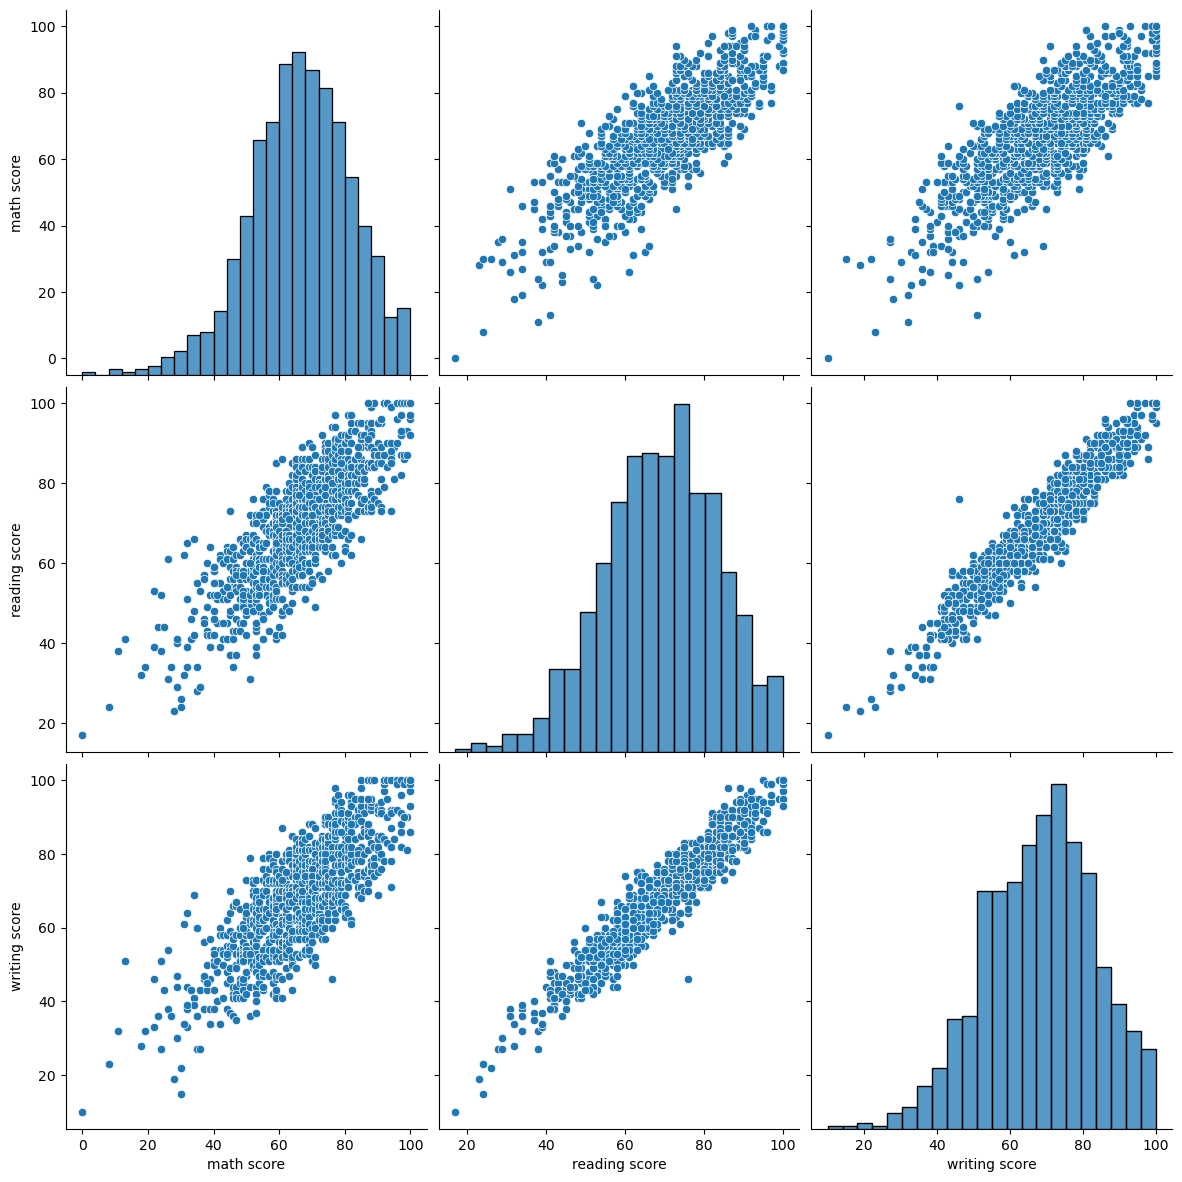

In [30]:
sns.pairplot(data[['math score', 'reading score', 'writing score']],height = 4)
plt.show()

### 1. Find out how many males and females participated in the test.

In [9]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

### 2. What do you think about the students' parental level of education?

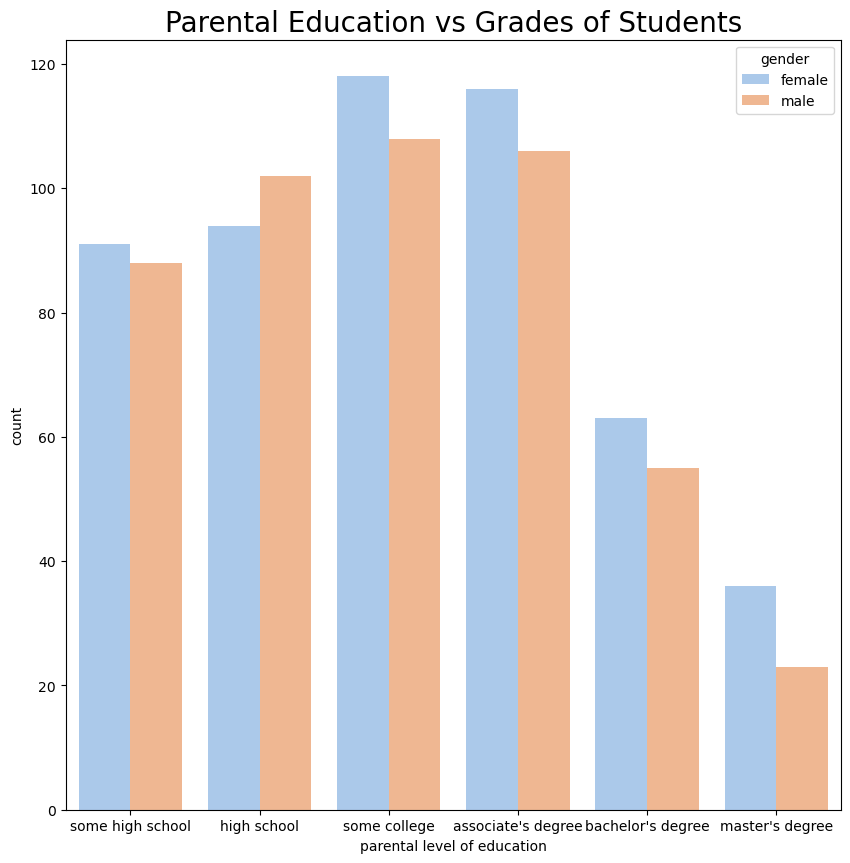

In [39]:
plt.figure(figsize=(10,10))
sns.countplot(x = data['parental level of education'], data = data, hue = data['gender'], palette = 'pastel')
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

In [ ]:
#As we can see, females take up more of each degree aside from high school


### 3. Who scores the most on average for math, reading and writing based on:

## Gender

<function matplotlib.pyplot.show(close=None, block=None)>

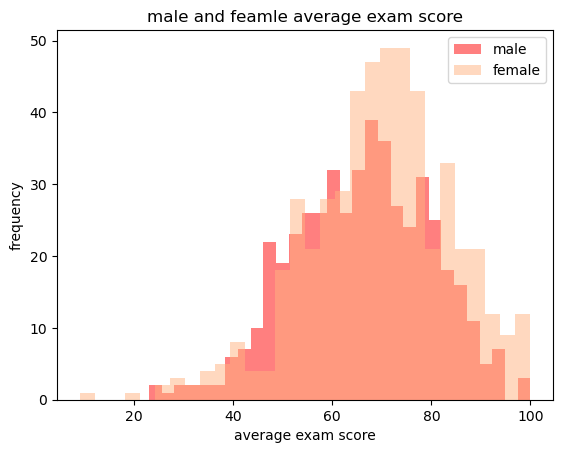

In [26]:
m = plt.hist(data[data['gender']== 'male'].average_score,bins=30,fc=(1,0,0,0.5),label='male')
f= plt.hist(data[data['gender']=='female'].average_score,bins=30,fc=(1,0.7,0.5,0.5),label='female')
plt.legend()
plt.xlabel('Average exam score')
plt.ylabel('Frequency')
plt.title('Male and feamle average exam score')
plt.show

### test preparation

<function matplotlib.pyplot.show(close=None, block=None)>

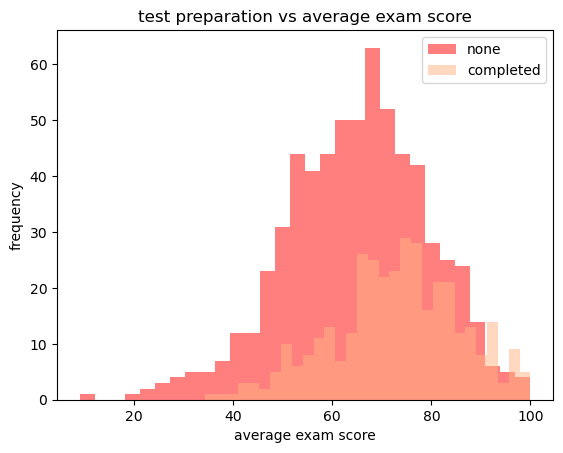

In [69]:
plt.hist(data[data['test preparation course']== 'none'].average_score,bins=30,fc=(1,0,0,0.5),label= 'none')
plt.hist(data[data['test preparation course']=='completed'].average_score,bins=30,fc=(1,0.7,0.5,0.5),label= 'completed')
plt.legend()
plt.xlabel('Average exam score')
plt.ylabel('Frequency')
plt.title('Test Preparation vs Average Exam Score')
plt.show

### 4. What do you think about the scoring variation for math, reading and writing based on


### gender

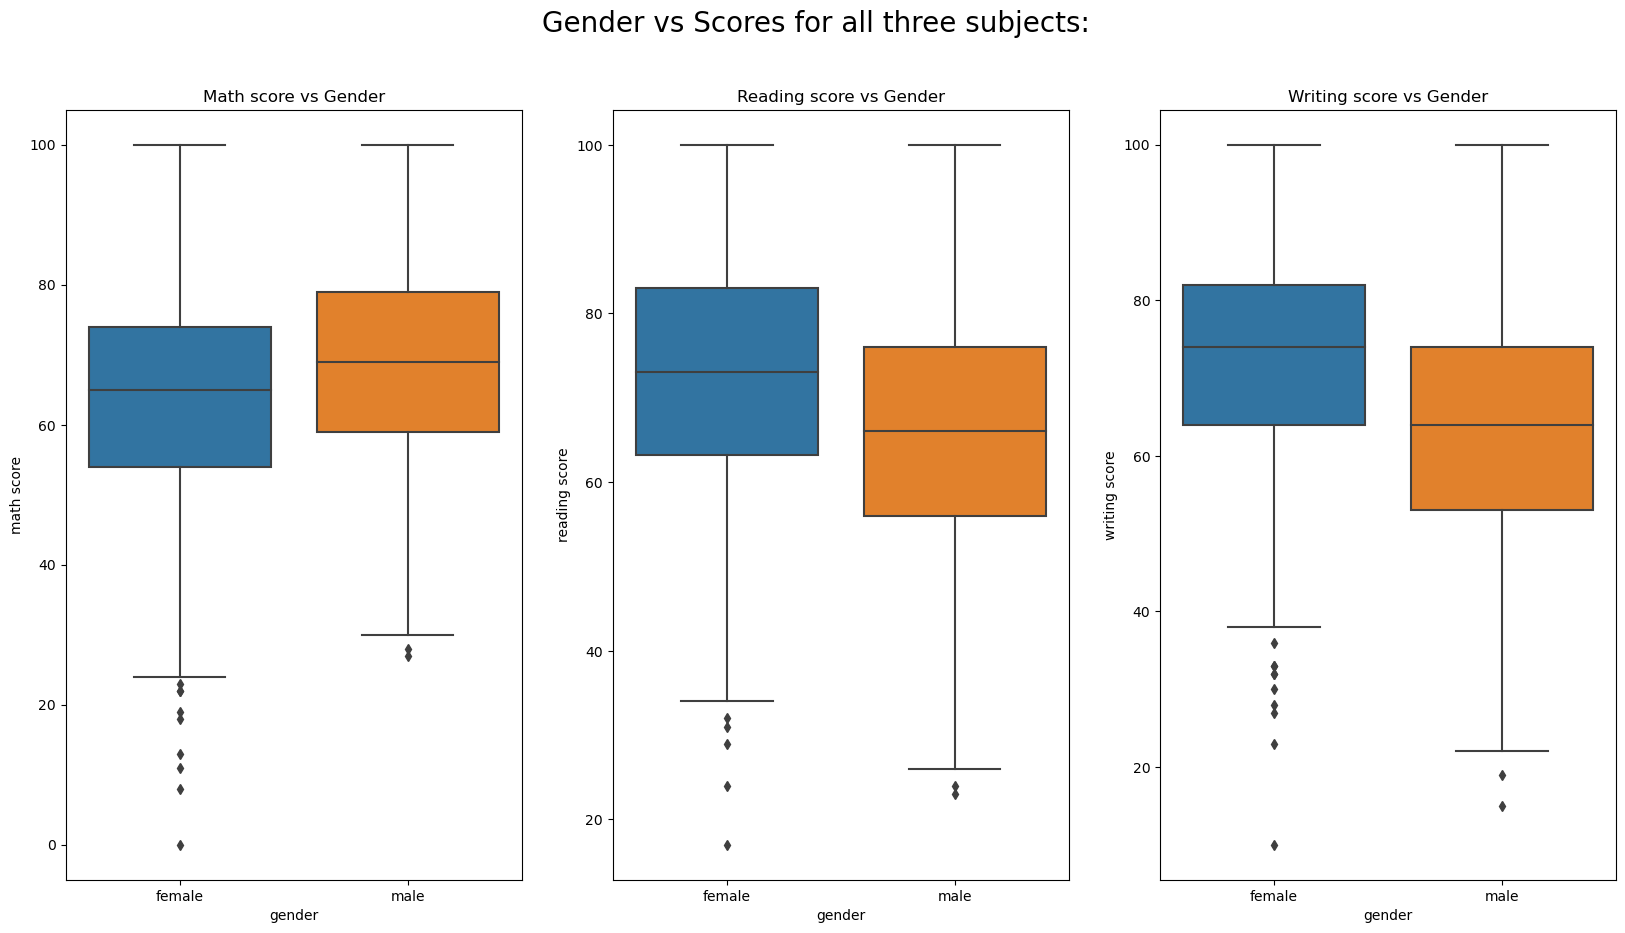

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Gender vs Scores for all three subjects:', fontsize=20)
# Math
sns.boxplot(x='gender', y='math score', data=data, ax=ax1)
ax1.title.set_text('Math score vs Gender')
# Reading
sns.boxplot(x='gender', y='reading score', data=data, ax=ax2)
ax2.title.set_text('Reading score vs Gender')
# Writing
sns.boxplot(x='gender', y='writing score', data=data, ax=ax3)
ax3.title.set_text('Writing score vs Gender')

### Test preparation 

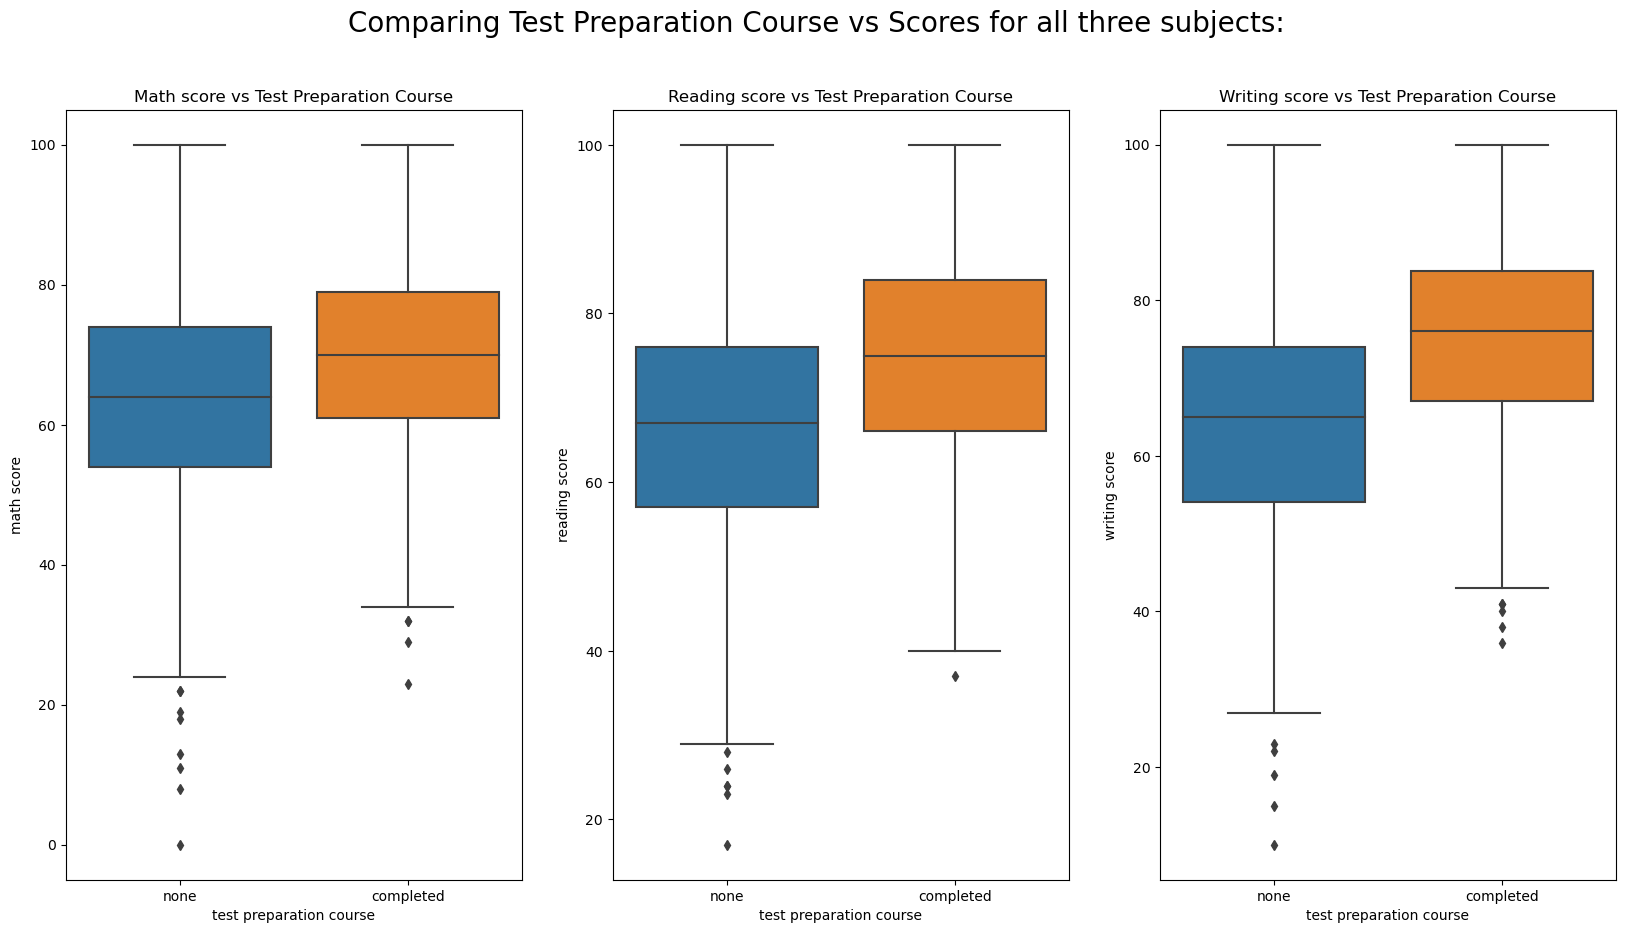

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Comparing Test Preparation Course vs Scores for all three subjects:', fontsize=20)
# Math
sns.boxplot(x='test preparation course', y='math score', data=data, ax=ax1)
ax1.title.set_text('Math score vs Test Preparation Course')
# Reading
sns.boxplot(x='test preparation course', y='reading score', data=data, ax=ax2)
ax2.title.set_text('Reading score vs Test Preparation Course')
# Writing
sns.boxplot(x='test preparation course', y='writing score', data=data, ax=ax3)
ax3.title.set_text('Writing score vs Test Preparation Course')

## 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this. 

In [48]:
math_score= data[['math score']]
math_score

,math score
0,0
1,8
2,18
3,11
4,22
...,...
995,99
996,100
997,100
998,100


In [51]:
Q3 = np.percentile(math_score, 75, interpolation = 'midpoint')
Q3

77.0

In [55]:
top25percentage=data.nlargest(250, ['math score'])
top25percentage

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,average_score
515,female,group E,some college,standard,none,100,92,97,96.333333,96.333333
516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000,100.000000
517,female,group E,associate's degree,standard,none,100,100,100,100.000000,100.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667,98.666667
...,...,...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86,83.000000,83.000000
429,female,group E,some high school,standard,none,77,79,80,78.666667,78.666667
849,male,group A,bachelor's degree,standard,none,77,67,68,70.666667,70.666667
850,male,group C,associate's degree,free/reduced,none,77,67,64,69.333333,69.333333


In [57]:
top25percentage.sort_values(by='math score',ascending= False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,average_score
515,female,group E,some college,standard,none,100,92,97,96.333333,96.333333
517,female,group E,associate's degree,standard,none,100,100,100,100.000000,100.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667,98.666667
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667,97.666667
...,...,...,...,...,...,...,...,...,...,...
417,female,group B,master's degree,standard,none,77,90,84,83.666667,83.666667
416,female,group B,bachelor's degree,free/reduced,none,77,85,87,83.000000,83.000000
415,female,group B,master's degree,free/reduced,completed,77,97,94,89.333333,89.333333
414,female,group A,high school,free/reduced,completed,77,88,85,83.333333,83.333333
